<a href="https://colab.research.google.com/github/michellechen202212/ucb/blob/main/prompt_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

# Data Problem Definition

The objective is to analyze the data to identify the key factors that influence the price of a used car. By examining features such as mileage, year, condition, and fuel type, we aim to determine which attributes have the greatest impact on pricing. Using predictive modeling and feature importance analysis, we’ll uncover trends and relationships in the data. This will allow us to provide actionable insights to the dealership, helping them align their pricing strategies with what customers value most.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Load the dataset
file_path = 'sample_data/vehicles_cleaned_outliers_removed.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
data_cleaned = data.dropna()

# Define features (X) and target variable (y)
X = data_cleaned.drop(columns=['price', 'model', 'manufacturer'])
y = data_cleaned['price']

# Select categorical and numerical features
categorical_features = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'paint_color']
numerical_features = ['year', 'odometer']

# Preprocess categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the pipeline with Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
pipeline.fit(X_train, y_train)

# Predict and calculate R^2
y_pred = pipeline.predict(X_test)
initial_r2 = r2_score(y_test, y_pred)
print("Initial R^2 with Linear Regression:", initial_r2)

# Define the pipeline with Ridge Regression for regularization
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # Regularization parameter alpha set to 1.0
])

# Train the Ridge regression model
ridge_pipeline.fit(X_train, y_train)

# Predict and calculate R^2 with Ridge Regression
y_ridge_pred = ridge_pipeline.predict(X_test)
ridge_r2 = r2_score(y_test, y_ridge_pred)
print("R^2 with Ridge Regression:", ridge_r2)

Initial R^2 with Linear Regression: 0.6338518845873631
R^2 with Ridge Regression: 0.6338437540412545


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, make_scorer
import numpy as np

# Load the dataset
file_path = 'sample_data/vehicles_cleaned_outliers_removed.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
data_cleaned = data.dropna().drop_duplicates()

# Define features (X) and target variable (y)
X = data_cleaned.drop(columns=['price', 'model', 'manufacturer'])
y = data_cleaned['price']

# Select categorical and numerical features
categorical_features = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'paint_color']
numerical_features = ['year', 'odometer']

# Preprocess categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the pipeline with Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define the pipeline with Ridge Regression for regularization
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # Regularization parameter alpha set to 1.0
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
pipeline.fit(X_train, y_train)

# Predict and calculate R^2
y_pred = pipeline.predict(X_test)
initial_r2 = r2_score(y_test, y_pred)
initial_rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMS
print("Initial R^2 with Linear Regression:", initial_r2)
print("Initial RMSE with Linear Regression:", initial_rmse)

# Train the Ridge regression model
ridge_pipeline.fit(X_train, y_train)

# Predict and calculate R^2 with Ridge Regression
y_ridge_pred = ridge_pipeline.predict(X_test)
ridge_r2 = r2_score(y_test, y_ridge_pred)
print("R^2 with Ridge Regression:", ridge_r2)
# Calculate MSE and RMSE for Ridge Regression
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
print(f"MSE (Ridge Regression): {ridge_mse:.2f}")
print(f"RMSE (Ridge Regression): {ridge_rmse:.2f}")

# Perform cross-validation
# Define a custom scorer for R^2
r2_scorer = make_scorer(r2_score)

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Reduce dataset size by taking a random sample (20% of data)
sampled_data = data_cleaned.sample(frac=0.2, random_state=42)
X_sampled = sampled_data.drop(columns=['price', 'model', 'manufacturer'])
y_sampled = sampled_data['price']

# Perform cross-validation with the Ridge regression pipeline on the smaller dataset
cv_ridge_scores_sampled = cross_val_score(ridge_pipeline, X_sampled, y_sampled, cv=kf, scoring=r2_scorer)
cv_linear_scores_sampled = cross_val_score(pipeline, X_sampled, y_sampled, cv=kf, scoring=r2_scorer)

# Calculate the mean R^2 score for each model on the sampled dataset
ridge_cv_mean_r2_sampled = cv_ridge_scores_sampled.mean()
linear_cv_mean_r2_sampled = cv_linear_scores_sampled.mean()

# Display cross-validation results
print("Cross-Validation Results:")
print(f"Mean R^2 (Linear Regression): {linear_cv_mean_r2_sampled:.4f}")
print(f"Mean R^2 (Ridge Regression): {ridge_cv_mean_r2_sampled:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Initial R^2 with Linear Regression: 0.5917118918892709
Initial RMSE with Linear Regression: 7361.543070203743
R^2 with Ridge Regression: 0.5917031791592235
MSE (Ridge Regression): 54193472.82
RMSE (Ridge Regression): 7361.62
Cross-Validation Results:
Mean R^2 (Linear Regression): 0.5912
Mean R^2 (Ridge Regression): 0.5912


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import numpy as np

# Load the dataset
file_path = 'sample_data/vehicles_cleaned_outliers_removed.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
data_cleaned = data.dropna().drop_duplicates()


# Define features (X) and target variable (y)
X = data_cleaned.drop(columns=['price', 'model', 'manufacturer'])
y = data_cleaned['price']

# Select categorical and numerical features
categorical_features = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'paint_color']
numerical_features = ['year', 'odometer']

# Preprocess categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the pipeline with Ridge Regression
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]  # Different values for the regularization strength
}

# Set up Grid Search
grid_search = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='neg_mean_squared_error',  # Use negative MSE for optimization
    verbose=2
)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test)

# Calculate MSE and RMSE
best_mse = mean_squared_error(y_test, y_pred_best)
best_rmse = np.sqrt(best_mse)

# Output results
print("Best Parameters:", best_params)
print(f"Best MSE: {best_mse:.2f}")
print(f"Best RMSE: {best_rmse:.2f}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...............................regressor__alpha=0.1; total time=   1.1s
[CV] END ...............................regressor__alpha=0.1; total time=   1.0s
[CV] END ...............................regressor__alpha=0.1; total time=   0.6s
[CV] END ...............................regressor__alpha=0.1; total time=   0.6s
[CV] END ...............................regressor__alpha=0.1; total time=   0.6s
[CV] END ...............................regressor__alpha=1.0; total time=   0.6s
[CV] END ...............................regressor__alpha=1.0; total time=   0.6s
[CV] END ...............................regressor__alpha=1.0; total time=   0.6s
[CV] END ...............................regressor__alpha=1.0; total time=   0.6s
[CV] END ...............................regressor__alpha=1.0; total time=   0.6s
[CV] END ..............................regressor__alpha=10.0; total time=   0.6s
[CV] END ..............................regressor_

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Load the dataset
file_path = 'sample_data/vehicles_cleaned_outliers_removed.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
data_cleaned = data.dropna().drop_duplicates()

# Define features (X) and target variable (y)
X = data_cleaned.drop(columns=['price', 'model', 'manufacturer'])
y = data_cleaned['price']

# Select categorical and numerical features
categorical_features = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'paint_color']
numerical_features = ['year', 'odometer']

# Define RMSE as a scoring metric
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

# Preprocess categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Linear Regression
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print("Linear Regression:")
print(f"Test RMSE: {linear_rmse:.2f}")


# Ridge Regression: Hyperparameter tuning
ridge_param_grid = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

ridge_grid_search = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=ridge_param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring=rmse_scorer,
    verbose=2
)

ridge_grid_search.fit(X_train, y_train)

# Best Ridge Regression model
best_ridge_params = ridge_grid_search.best_params_
best_ridge_model = ridge_grid_search.best_estimator_

# Test set predictions for Ridge Regression
y_pred_ridge = best_ridge_model.predict(X_test)

# RMSE for Ridge Regression
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression:")
print("Best Parameters:", best_ridge_params)
print(f"Test RMSE: {ridge_rmse:.2f}")

# Gradient Boosting Pipeline
gbr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Gradient Boosting: Hyperparameter tuning
gbr_param_grid = {
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3]
}

gbr_grid_search = GridSearchCV(
    estimator=gbr_pipeline,
    param_grid=gbr_param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring=rmse_scorer,
    verbose=2
)

gbr_grid_search.fit(X_train, y_train)

# Best Gradient Boosting model
best_gbr_params = gbr_grid_search.best_params_
best_gbr_model = gbr_grid_search.best_estimator_

# Test set predictions for Gradient Boosting
y_pred_gbr = best_gbr_model.predict(X_test)

# RMSE for Gradient Boosting
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
print("Gradient Boosting:")
print("Best Parameters:", best_gbr_params)
print(f"Test RMSE: {gbr_rmse:.2f}")



Linear Regression:
Test RMSE: 7361.54
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............................regressor__alpha=0.01; total time=   1.0s
[CV] END ..............................regressor__alpha=0.01; total time=   1.0s
[CV] END ..............................regressor__alpha=0.01; total time=   0.8s
[CV] END ..............................regressor__alpha=0.01; total time=   0.6s
[CV] END ..............................regressor__alpha=0.01; total time=   0.6s
[CV] END ...............................regressor__alpha=0.1; total time=   0.6s
[CV] END ...............................regressor__alpha=0.1; total time=   0.6s
[CV] END ...............................regressor__alpha=0.1; total time=   0.6s
[CV] END ...............................regressor__alpha=0.1; total time=   0.6s
[CV] END ...............................regressor__alpha=0.1; total time=   0.6s
[CV] END ...............................regressor__alpha=1.0; total time=   0.6s
[CV] END ..

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

# Initial dataset review
1. load and preview the data
2. check for missing values
3. examine data types

# Data profiling
1. understand distributions
2. look for outliers
3. assess feature cardinality

# Data quality checks
1. dupiicate records
2. invalid entries (negative mileages, future years)
3. inconsistent formatting
4. missing or sparse features

# relationships and dependencies
1. correlations
2. explore interactions
3. check target variable

# business relevance
1. align data with business goals
2. identify missing features

# document findings
1. create a summary of data quality issues (missing values, outliers)
2. key insights about distributions and relationships
3. initial thoughts on which features might be more relevant to the business question.




In [5]:
import pandas as pd

# Load the dataset to explore its structure
file_path = 'sample_data/vehicles.csv'
vehicles_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
vehicles_data.head(), vehicles_data.info(), vehicles_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

(           id                  region  price  year manufacturer model  \
 0  7222695916                prescott   6000   NaN          NaN   NaN   
 1  7218891961            fayetteville  11900   NaN          NaN   NaN   
 2  7221797935            florida keys  21000   NaN          NaN   NaN   
 3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
 4  7210384030              greensboro   4900   NaN          NaN   NaN   
 
   condition cylinders fuel  odometer title_status transmission  VIN drive  \
 0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 
   size type paint_color state  
 0  NaN  NaN         NaN    az  
 1  NaN  NaN      

# Data profiling
1. understand distributions
2. look for outliers
3. assess feature cardinality

In [6]:
# Reimport necessary libraries to address the reset environment
import pandas as pd

# Reload the dataset from the user's provided file
file_path = 'sample_data/vehicles.csv'
vehicles_data = pd.read_csv(file_path)

# Data profiling: Basic information and structure
profile = {
    "Shape": vehicles_data.shape,
    "Columns": vehicles_data.columns.tolist(),
    "Missing Values": vehicles_data.isnull().sum(),
    "Data Types": vehicles_data.dtypes,
}

# Analyze distributions of numerical features
numerical_features = vehicles_data.select_dtypes(include=["float64", "int64"]).columns
numerical_stats = vehicles_data[numerical_features].describe()

# Check for outliers using IQR for numerical features
outliers = {}
for column in numerical_features:
    Q1 = vehicles_data[column].quantile(0.25)
    Q3 = vehicles_data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers[column] = vehicles_data[(vehicles_data[column] < Q1 - 1.5 * IQR) |
                                     (vehicles_data[column] > Q3 + 1.5 * IQR)][column].count()

# Assess feature cardinality for categorical features
categorical_features = vehicles_data.select_dtypes(include=["object"]).columns
categorical_cardinality = vehicles_data[categorical_features].nunique()

# Display findings
{
    "Profile Summary": profile,
    "Numerical Stats": numerical_stats,
    "Outliers Count": outliers,
    "Categorical Cardinality": categorical_cardinality,
}


{'Profile Summary': {'Shape': (426880, 18),
  'Columns': ['id',
   'region',
   'price',
   'year',
   'manufacturer',
   'model',
   'condition',
   'cylinders',
   'fuel',
   'odometer',
   'title_status',
   'transmission',
   'VIN',
   'drive',
   'size',
   'type',
   'paint_color',
   'state'],
  'Missing Values': id                   0
  region               0
  price                0
  year              1205
  manufacturer     17646
  model             5277
  condition       174104
  cylinders       177678
  fuel              3013
  odometer          4400
  title_status      8242
  transmission      2556
  VIN             161042
  drive           130567
  size            306361
  type             92858
  paint_color     130203
  state                0
  dtype: int64,
  'Data Types': id                int64
  region           object
  price             int64
  year            float64
  manufacturer     object
  model            object
  condition        object
  cylinders       

# 1. Profile Summary
Shape: The dataset contains 426,880 rows and 18 columns.
Columns: Lists all the features in the dataset, such as price, year, manufacturer, condition, and odometer.
Missing Values:
Shows the number of missing entries for each column. For example:
year has 1,205 missing values.
condition has 174,104 missing values (a significant percentage).
Some columns, like id, region, and price, have no missing values.
Data Types:
Indicates the data type of each column:
int64 and float64 for numerical columns (e.g., price, year, odometer).
object for categorical columns (e.g., region, manufacturer, fuel).


# 2. Numerical Stats
Statistical summary of numerical columns:

id: A unique identifier, likely not relevant for analysis.
price:
Wide range from $0 to $3.7 billion, indicating extreme outliers.
Median price ($13,950) is much lower than the mean ($75,199), showing right skewness.
year:
Ranges from 1900 to 2022; older years may include outliers or unusual entries.
odometer:
Average mileage is ~98,043, but values up to 10 million suggest potential errors.


# 3. Outliers Count
Identifies the number of extreme values (potentially problematic) for key numerical columns:

price: 8,177 rows contain outliers based on the Interquartile Range (IQR) method.
year: 15,896 rows have outliers, likely older or invalid years.
odometer: 4,385 rows have unusually high or low mileage values.

# 4. Categorical Cardinality
Shows the number of unique categories in each categorical column:

High Cardinality:
model (29,649 unique values): Many unique car models, which might require grouping or simplification.
VIN (118,246 unique values): Likely not useful for analysis due to its specificity.
region (404 unique values): Indicates a large geographic coverage.
Low Cardinality:
Features like condition (6 categories), cylinders (8 categories), and fuel (5 categories) are manageable for analysis.


# What This Means
Key Challenges:

Missing data in columns like condition and cylinders may require imputation or removal.
Extreme outliers in price, year, and odometer could distort modeling and should be addressed.
High cardinality features like model might complicate categorical encoding and require grouping.
Opportunities:

Numerical features (price, year, odometer) can provide strong predictive power once cleaned.
Manageable categorical features (e.g., condition, fuel) can be used to capture important trends.
Next Steps:

Handle missing data and outliers.
Simplify high-cardinality categorical features.
Align the dataset with the business goal of identifying price drivers for used cars.



In [8]:

# Calculate missing values for each column
missing_values = vehicles_data.isnull().sum()

# Display columns with missing values
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

# Action: Set a threshold for excessive missing data (e.g., drop columns with more than 25% missing values)
threshold = 0.50
columns_to_drop = missing_values[missing_values > len(vehicles_data) * threshold].index

# Display the columns that will be dropped due to excessive missing values
print(f"\nColumns dropped due to more than {threshold * 100}% missing values:")
print(list(columns_to_drop))

# Add specific columns to drop explicitly
additional_columns_to_drop = ['id', 'VIN', 'size', 'type','region','state', 'title_status']
columns_to_drop = columns_to_drop.union(additional_columns_to_drop)



# Display the final list of columns to drop
print(f"\nColumns dropped due to more than {threshold * 100}% missing values or explicit removal:")
print(list(columns_to_drop))

# Drop columns with excessive missing values or explicitly specified columns
vehicles_data_cleaned = vehicles_data.drop(columns=columns_to_drop, errors='ignore')

# Confirm columns are dropped
print(f"\nRemaining Columns After Dropping:")
print(vehicles_data_cleaned.columns)

# Remove rows where 'year' is earlier than 2000
if 'year' in vehicles_data_cleaned.columns:
    vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['year'] >= 2000]
    print(f"\nRemoved rows with 'year' earlier than 2000. Remaining rows: {len(vehicles_data_cleaned)}")
else:
    print("\nColumn 'year' not found in the dataset. Skipping filtering by year.")


# For remaining missing values, decide to drop or impute (example: impute numerical columns with median)
numerical_columns = vehicles_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if vehicles_data_cleaned[col].isnull().sum() > 0:
        vehicles_data_cleaned[col].fillna(vehicles_data_cleaned[col].median(), inplace=True)

# For categorical columns, fill missing values with the mode (most frequent value)
categorical_columns = vehicles_data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if vehicles_data_cleaned[col].isnull().sum() > 0:
        vehicles_data_cleaned[col].fillna(vehicles_data_cleaned[col].mode()[0], inplace=True)




# Confirm no missing values remain
print("\nMissing Values After Handling:")
print(vehicles_data_cleaned.isnull().sum())

# Save the cleaned dataset to a CSV file
cleaned_file_path = 'sample_data/vehicles_cleaned.csv'
vehicles_data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}.")




Missing Values in Each Column:
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

Columns dropped due to more than 50.0% missing values:
['size']

Columns dropped due to more than 50.0% missing values or explicit removal:
['VIN', 'id', 'region', 'size', 'state', 'title_status', 'type']

Remaining Columns After Dropping:
Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'paint_color'],
      dtype='object')

Removed rows with 'year' earlier than 2000. Remaining rows: 400425


<ipython-input-8-a747877bcb34>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_data_cleaned[col].fillna(vehicles_data_cleaned[col].median(), inplace=True)
<ipython-input-8-a747877bcb34>:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me


Missing Values After Handling:
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
paint_color     0
dtype: int64

Cleaned dataset saved to vehicles_cleaned.csv.


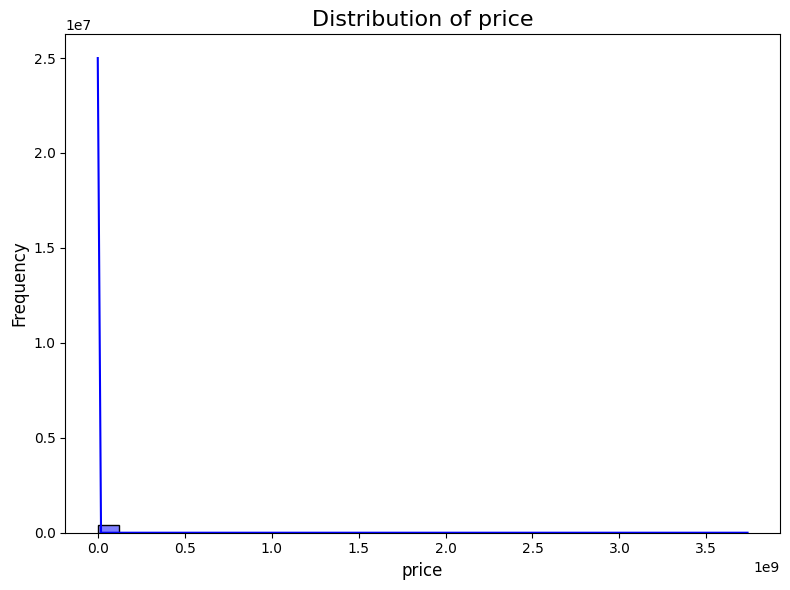

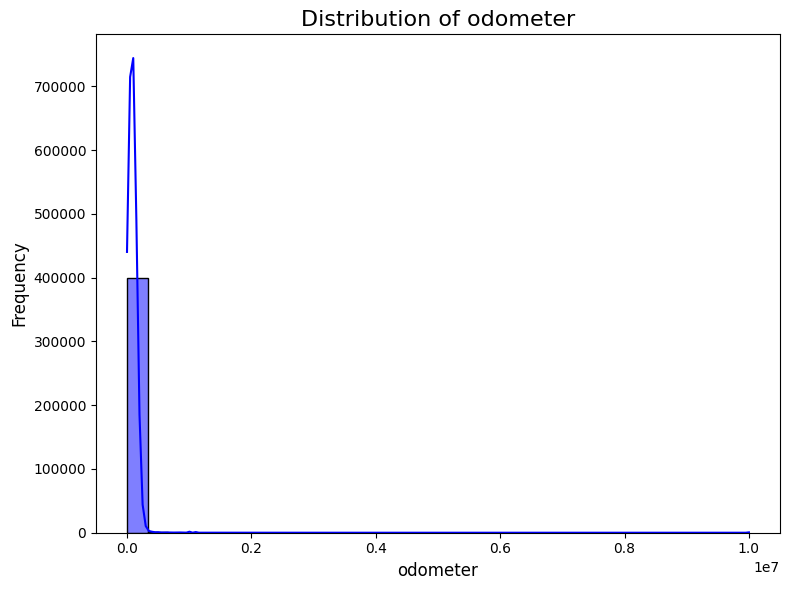

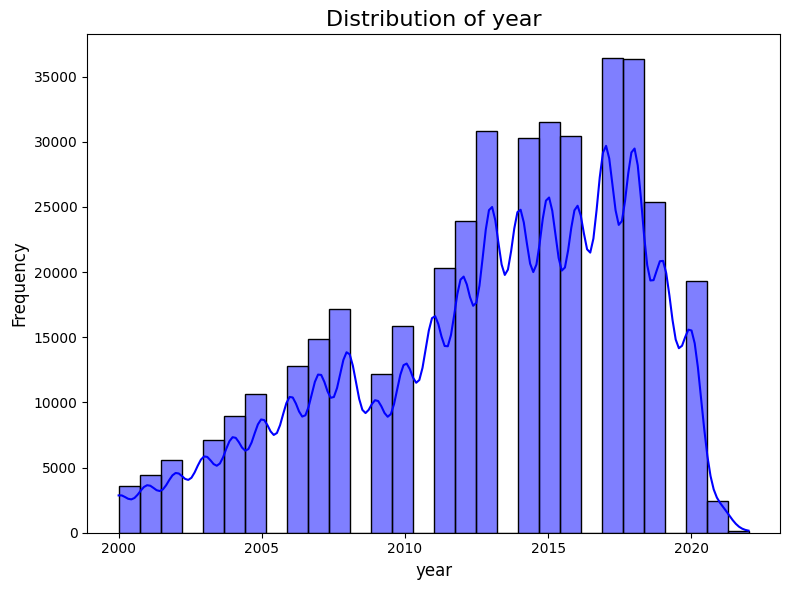

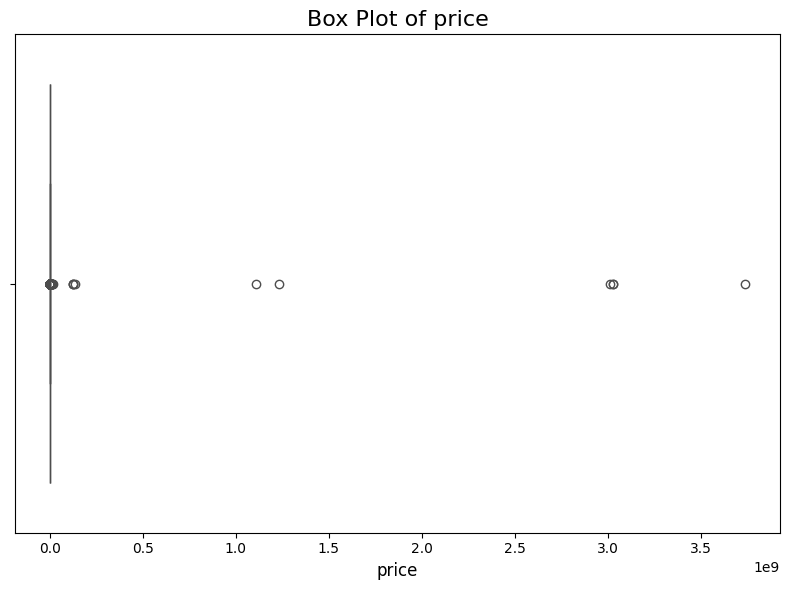

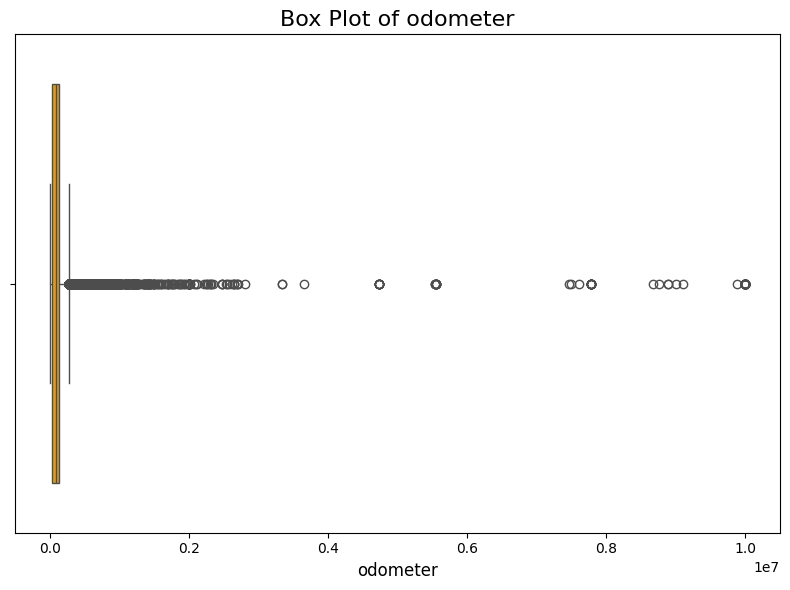

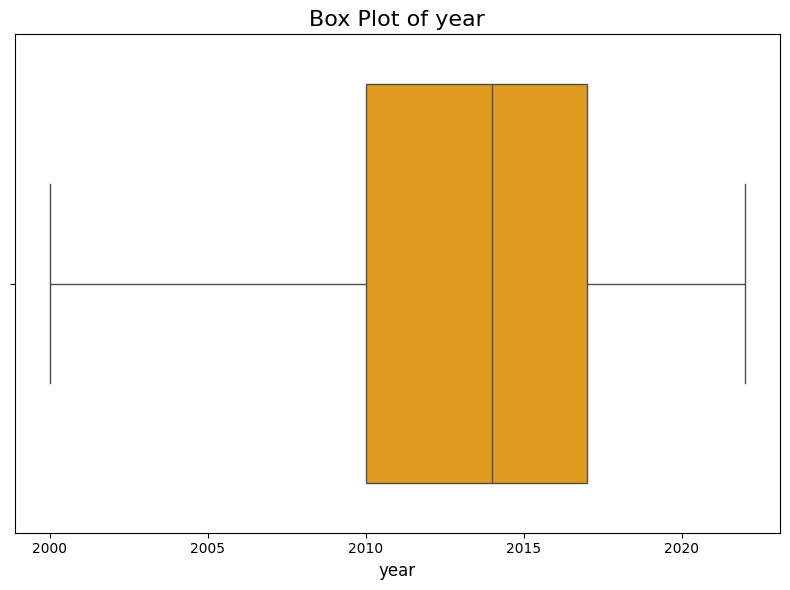

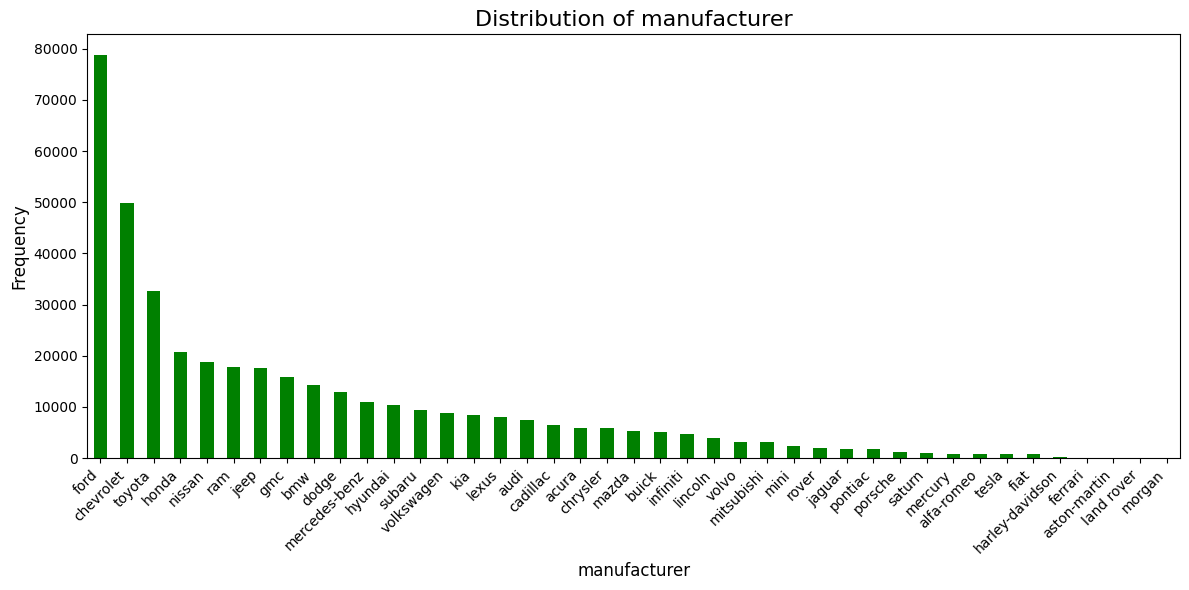

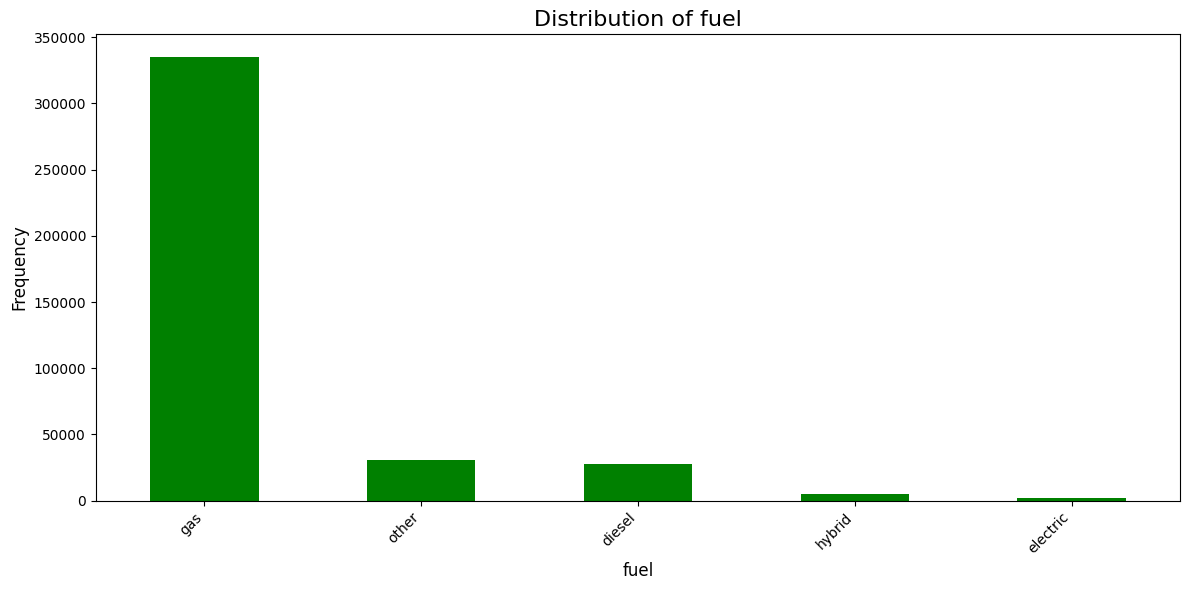

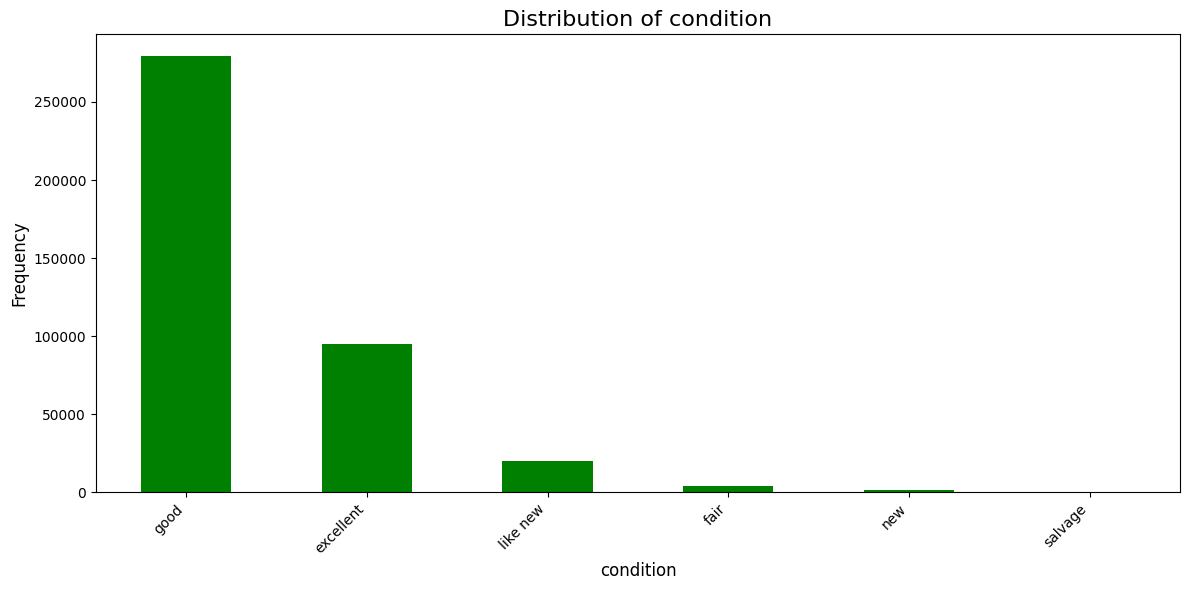

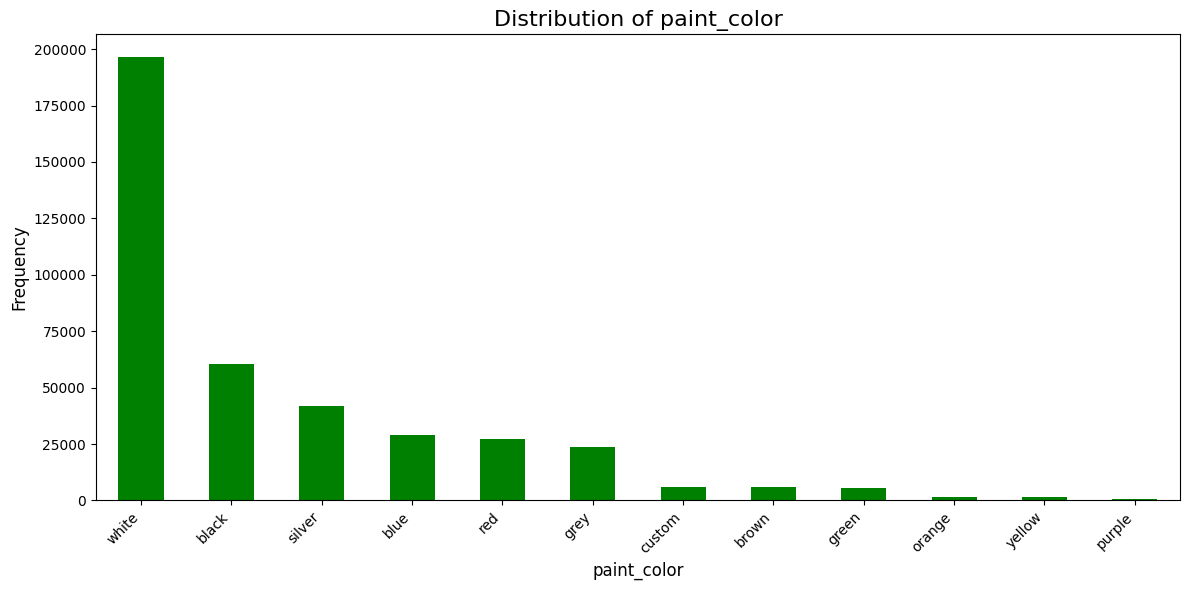

Dataset saved to vehicles_cleaned_no_outliers.csv after handling outliers.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset (replace 'vehicles_cleaned.csv' with your actual file path)
file_path = 'sample_data/vehicles_cleaned.csv'
vehicles_data_cleaned = pd.read_csv(file_path)

# Explore Feature Distributions: Visualize numerical variables
numerical_columns = ['price', 'odometer', 'year']

# Histograms for numerical variables
for col in numerical_columns:
    if col in vehicles_data_cleaned.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(vehicles_data_cleaned[col], bins=30, kde=True, color='blue')
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.tight_layout()
        plt.show()

# Box plots for numerical variables to identify outliers
for col in numerical_columns:
    if col in vehicles_data_cleaned.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=vehicles_data_cleaned[col], color='orange')
        plt.title(f'Box Plot of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.tight_layout()
        plt.show()

# Explore Feature Distributions: Categorical variables
categorical_columns = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']

# Bar charts for categorical variables
for col in categorical_columns:
    if col in vehicles_data_cleaned.columns:
        plt.figure(figsize=(12, 6))
        vehicles_data_cleaned[col].value_counts().plot(kind='bar', color='green')
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Action: Handle outliers using IQR for numerical columns
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for numerical variables
for col in numerical_columns:
    if col in vehicles_data_cleaned.columns:
        vehicles_data_cleaned = handle_outliers_iqr(vehicles_data_cleaned, col)

# Save the dataset after handling outliers (optional)
cleaned_file_path_after_outliers = 'sample_data/vehicles_cleaned_no_outliers.csv'
vehicles_data_cleaned.to_csv(cleaned_file_path_after_outliers, index=False)
print(f"Dataset saved to {cleaned_file_path_after_outliers} after handling outliers.")


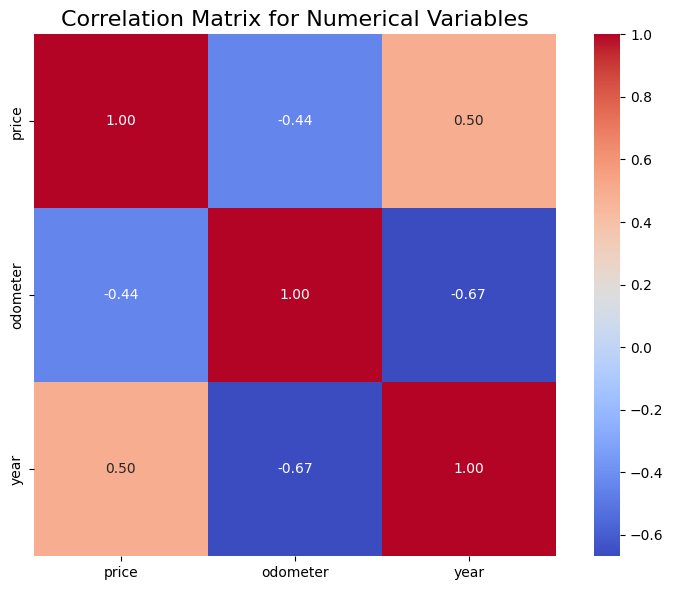

Features Strongly Correlated with Price:
price       1.000000
year        0.495955
odometer   -0.444403
Name: price, dtype: float64

Average Price by Manufacturer:
manufacturer
tesla              35068.592593
alfa-romeo         28699.407801
jaguar             27893.039818
porsche            26092.138405
ram                25541.083468
rover              23936.616999
audi               22119.268999
gmc                21611.924584
aston-martin       21021.769231
acura              19902.492682
lincoln            19741.634159
infiniti           19667.233144
lexus              19356.928940
cadillac           19235.375648
bmw                18761.709691
jeep               18378.878579
mercedes-benz      18326.990450
ford               17684.399485
volvo              17582.881133
chevrolet          17546.820137
toyota             15984.613440
buick              14647.854163
mini               14198.079115
mitsubishi         13865.171565
dodge              13817.657663
subaru             1321

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset (replace 'vehicles_cleaned_no_outliers.csv' with your actual file path)
file_path = 'sample_data/vehicles_cleaned_no_outliers.csv'
vehicles_data_cleaned = pd.read_csv(file_path)

# Examine Correlations: Heatmap for numerical variables
numerical_columns = ['price', 'odometer', 'year']

# Compute correlation matrix
correlation_matrix = vehicles_data_cleaned[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix for Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

# Identify features strongly correlated with price
strong_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("Features Strongly Correlated with Price:")
print(strong_correlation)

# Cross-Tabulations for Categorical Variables
categorical_columns = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']

# Group means for each categorical variable
for col in categorical_columns:
    if col in vehicles_data_cleaned.columns:
        group_means = vehicles_data_cleaned.groupby(col)['price'].mean().sort_values(ascending=False)
        print(f"\nAverage Price by {col.capitalize()}:")
        print(group_means)

# Example Pivot Table: Manufacturer vs Price
pivot_table = vehicles_data_cleaned.pivot_table(values='price', index='manufacturer', aggfunc='mean').sort_values(by='price', ascending=False)
print("\nPivot Table: Average Price by Manufacturer:")
print(pivot_table)

# Understanding Correlation
Correlation measures the strength and direction of the linear relationship between two variables.
Values close to 1: Strong positive correlation (e.g., as one variable increases, the other also increases).
Values close to -1: Strong negative correlation (e.g., as one variable increases, the other decreases).
Values close to 0: Weak or no linear correlation


# Key observations from the heatmap

## Price vs. Year:
Correlation = 0.50 (moderate positive correlation).
This suggests newer cars tend to have higher prices.

## Price vs. Odometer:
Correlation = -0.44 (moderate negative correlation).
Indicates that cars with higher mileage generally have lower prices.

## Year vs. Odometer:
Correlation = -0.67 (strong negative correlation).
Implies that newer cars tend to have lower mileage, which is expected.

## Diagonal (Self-Correlation):
Each variable is perfectly correlated with itself (correlation = 1.00), as shown by the red diagonal.



# Implications (continued)
## Drivers of Price:

Year and Odometer are important predictors of price:
Newer cars (higher year) tend to command higher prices.
Cars with more mileage (higher odometer) generally have lower prices.
These relationships align with business intuition and customer expectations for used cars.
## Interdependence of Features:

The strong negative correlation between Year and Odometer suggests that older cars typically accumulate more mileage. This interdependence might require careful handling during feature engineering to avoid multicollinearity in predictive models.
## Feature Selection:

Both Year and Odometer provide valuable information for predicting price. However, care should be taken to ensure that they complement each other in the model rather than introducing redundancy.


# Next Steps

Focus on Year and Odometer:
Include these variables in the predictive model as they are significant drivers of car prices.
Check for Multicollinearity:
Use variance inflation factor (VIF) or other techniques to ensure that Year and Odometer do not overly influence each other in the model.
Consider Transformations:
If relationships are non-linear, transformations (e.g., log or polynomial features) might be necessary to improve model performance.

In [14]:
# Load the cleaned dataset (replace 'vehicles_cleaned_no_outliers.csv' with your actual file path)
file_path = 'sample_data/vehicles_cleaned_no_outliers.csv'
vehicles_data_cleaned = pd.read_csv(file_path)

# Document Missing Values
missing_values = vehicles_data_cleaned.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

# Document Inconsistent Data Entries
# Example: Checking categorical variables for unique values to identify inconsistencies
categorical_columns = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']
print("\nInconsistent Data Entries in Categorical Variables:")
for col in categorical_columns:
    if col in vehicles_data_cleaned.columns:
        print(f"\n{col}:")
        print(vehicles_data_cleaned[col].unique())

# Document Outliers
# Numerical variables to check for outliers
numerical_columns = ['price', 'odometer', 'year']


def remove_outliers_iqr(df, column, lower_bound_override=None):
    """
    Removes outliers from a DataFrame column using the IQR method.
    Optionally, override the calculated lower bound.
    """
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Override lower bound if specified
    if lower_bound_override is not None:
        lower_bound = lower_bound_override

    # Filter rows within bounds
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df, lower_bound, upper_bound


# Handle outliers in 'price'
if 'price' in vehicles_data_cleaned.columns:
    vehicles_data_cleaned, price_lower, price_upper = remove_outliers_iqr(
        vehicles_data_cleaned, 'price', lower_bound_override=0
    )
    print(f"\nHandled outliers in 'price':")
    print(f"Lower bound: {price_lower}, Upper bound: {price_upper}")
    print(f"Remaining rows after removing 'price' outliers: {len(vehicles_data_cleaned)}")
else:
    print("\nColumn 'price' not found in the dataset. Skipping outlier handling for 'price'.")

# Handle outliers in 'odometer'
if 'odometer' in vehicles_data_cleaned.columns:
    vehicles_data_cleaned, odometer_lower, odometer_upper = remove_outliers_iqr(
        vehicles_data_cleaned, 'odometer', lower_bound_override=0
    )
    print(f"\nHandled outliers in 'odometer':")
    print(f"Lower bound: {odometer_lower}, Upper bound: {odometer_upper}")
    print(f"Remaining rows after removing 'odometer' outliers: {len(vehicles_data_cleaned)}")
else:
    print("\nColumn 'odometer' not found in the dataset. Skipping outlier handling for 'odometer'.")

# Save the cleaned dataset
cleaned_file_path = 'sample_data/vehicles_cleaned_outliers_removed.csv'
vehicles_data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}.")


print(vehicles_data_cleaned[numerical_columns].describe())


Missing Values in Each Column:
Series([], dtype: int64)

Inconsistent Data Entries in Categorical Variables:

manufacturer:
['gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury' 'harley-davidson'
 'ferrari' 'aston-martin' 'land rover' 'morgan']

fuel:
['gas' 'other' 'diesel' 'hybrid' 'electric']

condition:
['good' 'excellent' 'fair' 'like new' 'new' 'salvage']

paint_color:
['white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow' 'orange'
 'green' 'custom' 'purple']

Handled outliers in 'price':
Lower bound: 0, Upper bound: 55982.5
Remaining rows after removing 'price' outliers: 388784

Handled outliers in 'odometer':
Lower bound: 0, Upper bound: 269000.0
Remaining rows after removing 'odometer' outliers: 3

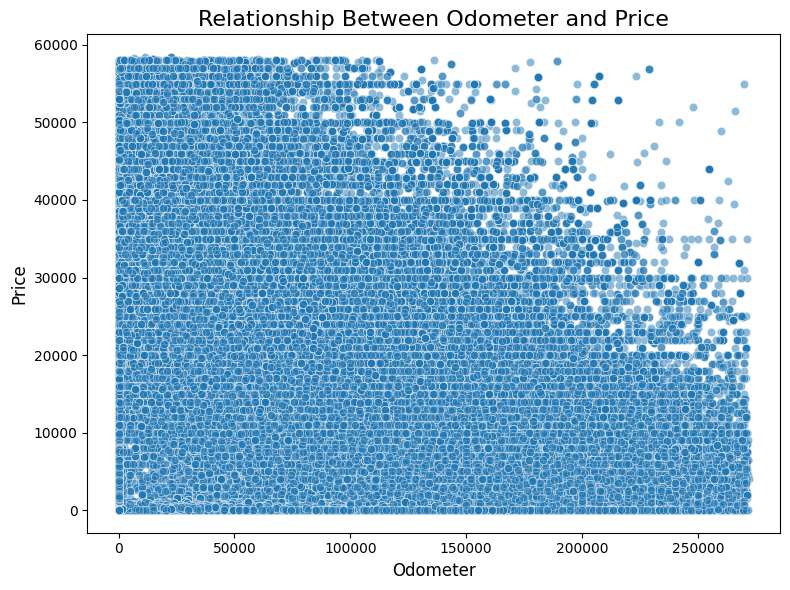

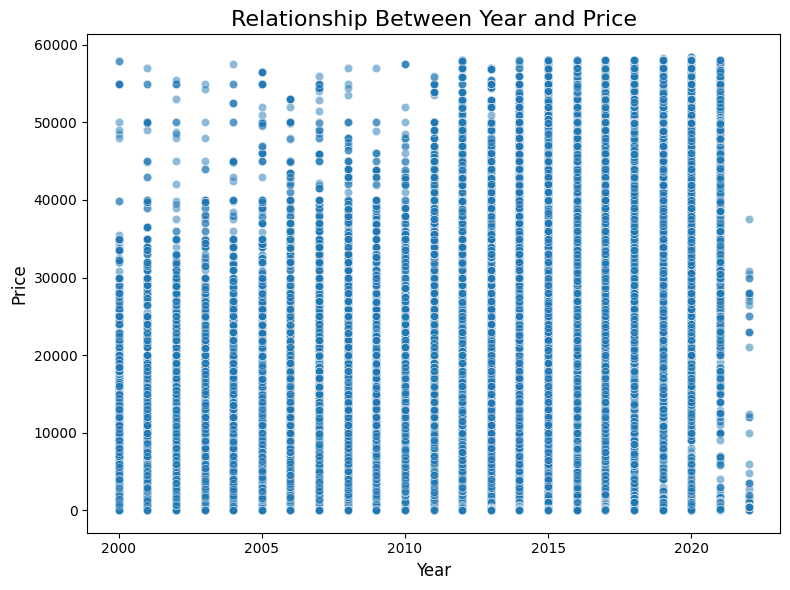

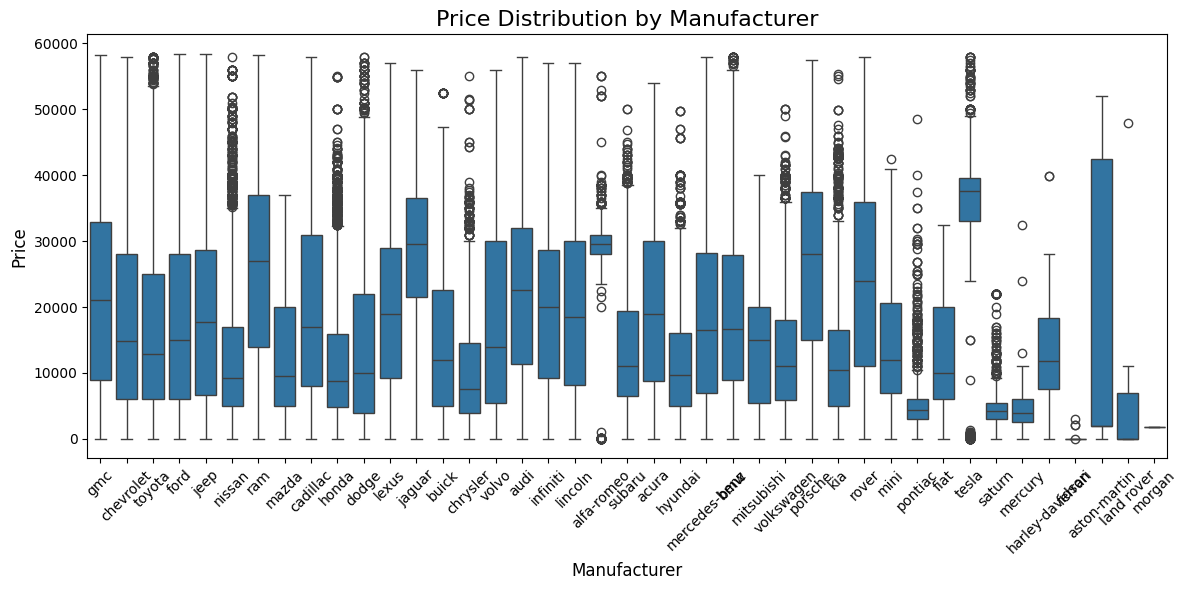

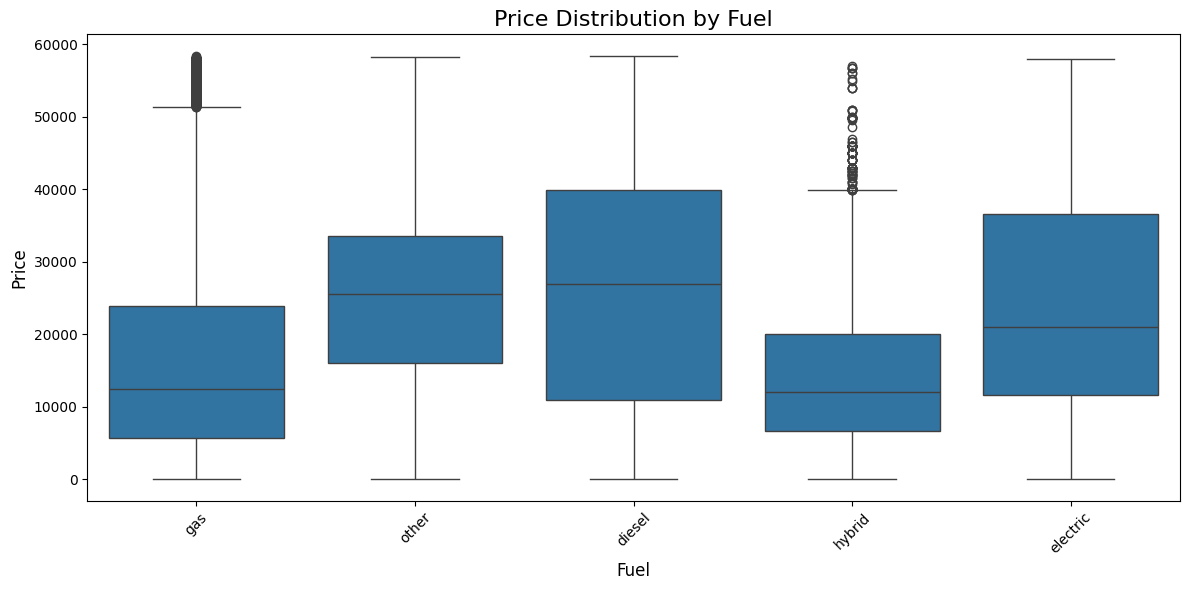

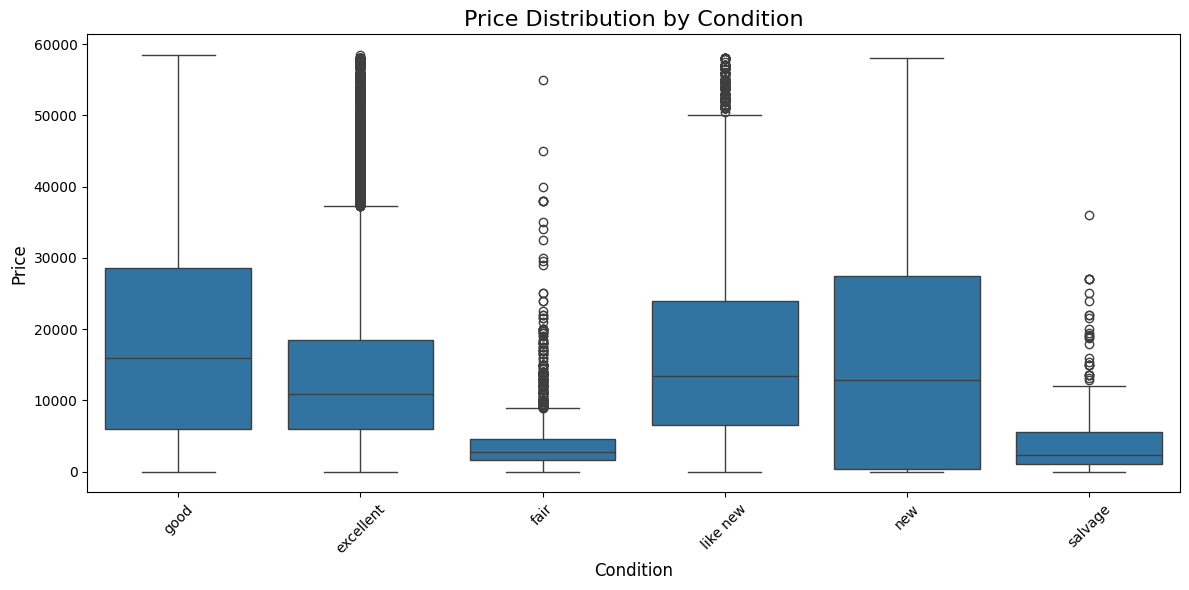

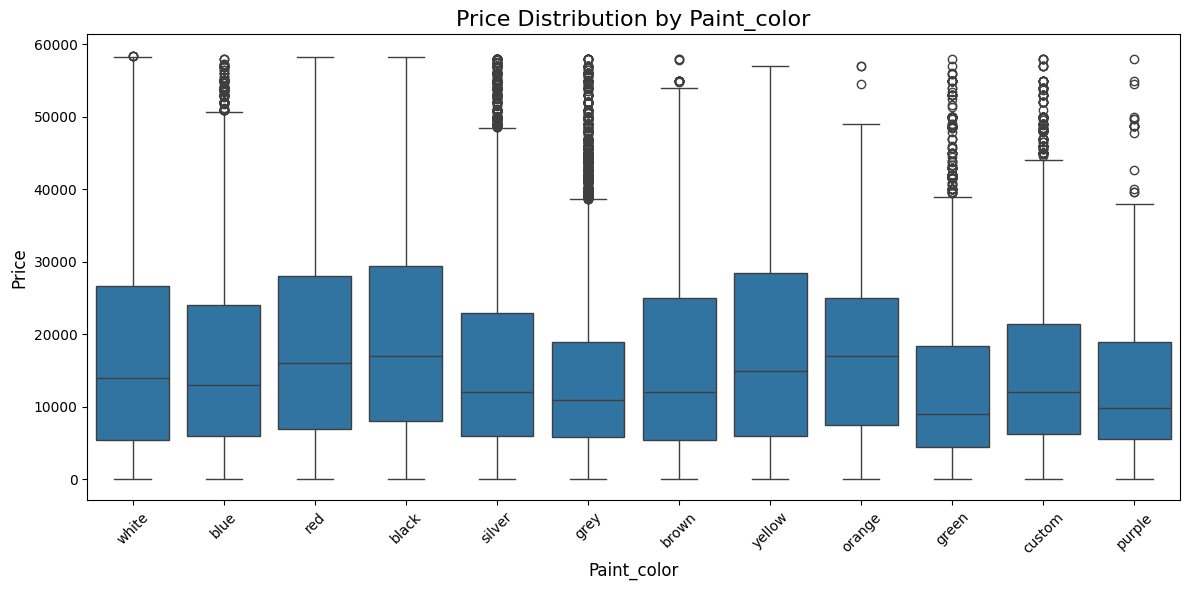


Preliminary Insights:
1. Numerical variables like 'odometer' and 'year' are expected to have clear linear relationships with price.
2. Categorical variables such as 'manufacturer' and 'fuel' are likely key drivers, as seen in box plot trends.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset (replace 'vehicles_cleaned_no_outliers.csv' with your actual file path)
file_path = 'sample_data/vehicles_cleaned_no_outliers.csv'
vehicles_data_cleaned = pd.read_csv(file_path)

# Numerical Variables: Relationship with Price
numerical_columns = ['odometer', 'year']

# Scatter plots to examine relationships
for col in numerical_columns:
    if col in vehicles_data_cleaned.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=vehicles_data_cleaned[col], y=vehicles_data_cleaned['price'], alpha=0.5)
        plt.title(f'Relationship Between {col.capitalize()} and Price', fontsize=16)
        plt.xlabel(col.capitalize(), fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.tight_layout()
        plt.show()

# Categorical Variables: Relationship with Price (Box plots for clear visualization)
categorical_columns = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']

for col in categorical_columns:
    if col in vehicles_data_cleaned.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=vehicles_data_cleaned[col], y=vehicles_data_cleaned['price'])
        plt.title(f'Price Distribution by {col.capitalize()}', fontsize=16)
        plt.xlabel(col.capitalize(), fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()




This scatter plot illustrates the relationship between Year and Price, with Odometer influencing the transparency or color of the data points (depending on the plot settings). Here's what it reveals:

# Key Observations:
## Price vs. Year:

Newer cars (higher Year): Tend to have higher prices, which aligns with the typical depreciation of vehicles over time.
Older cars (lower Year): Generally exhibit lower prices, but there are some outliers (e.g., vintage or collectible cars) that may have high prices despite their age.
## Spread of Prices:

Wide variation in older cars: For cars manufactured before 2005, prices are more dispersed, possibly reflecting differences in condition, mileage, and brand.
Tighter variation in newer cars: For cars from 2015 onward, prices are less variable, suggesting a more consistent valuation for newer vehicles.
## Influence of Odometer:

While not explicitly shown in this static plot, the title suggests that Odometer (Mileage) could be affecting the appearance of points (e.g., lighter or darker colors).
High mileage (older or heavily used cars) likely correlates with lower prices for a given year.
# Implications:
## Depreciation Trend:

Year is a critical factor for predicting price, as depreciation plays a significant role in car valuation.
Combining Year with Odometer would enhance predictive power by capturing both age and usage effects.
## Outliers:

The presence of older cars with high prices suggests niche categories like vintage cars, which might require separate analysis or exclusion from general models.
# Pricing Recommendations:

For newer cars, dealerships can expect more stable pricing trends, making them less risky for inventory management.
Older cars may require additional attention to features like mileage, condition, and market demand to accurately predict their value.

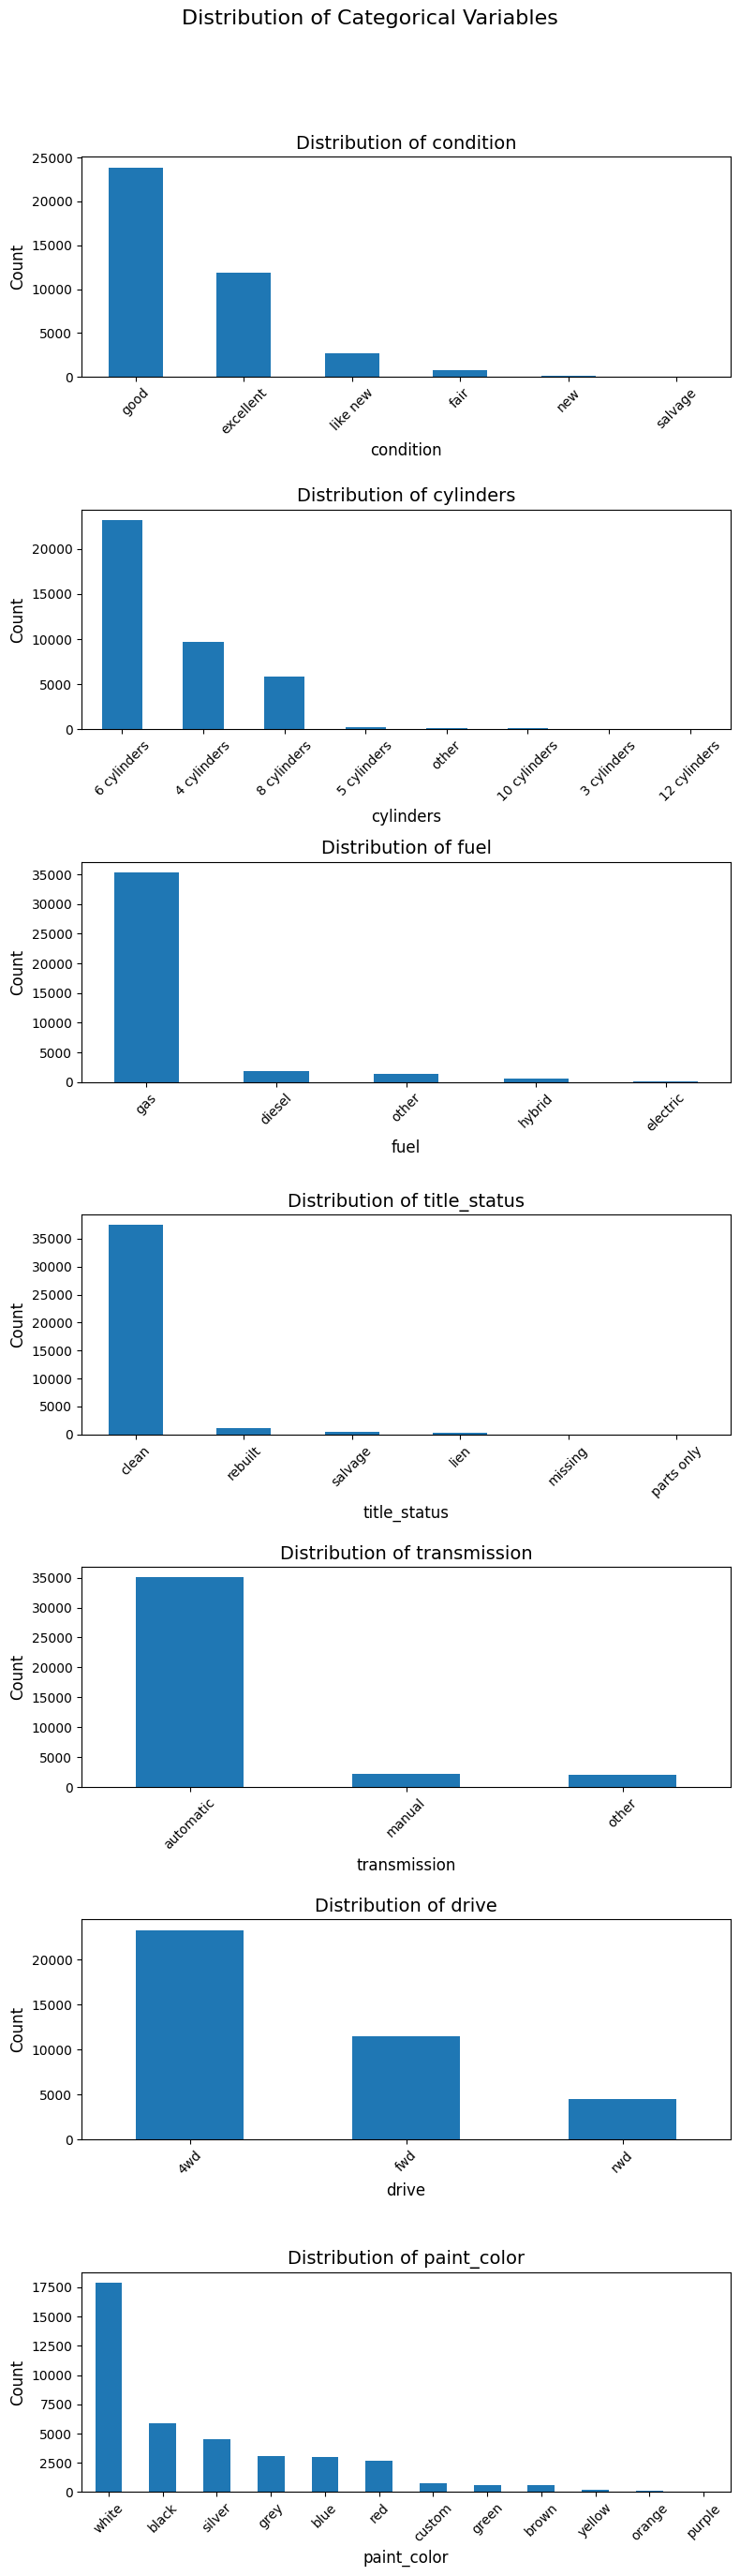

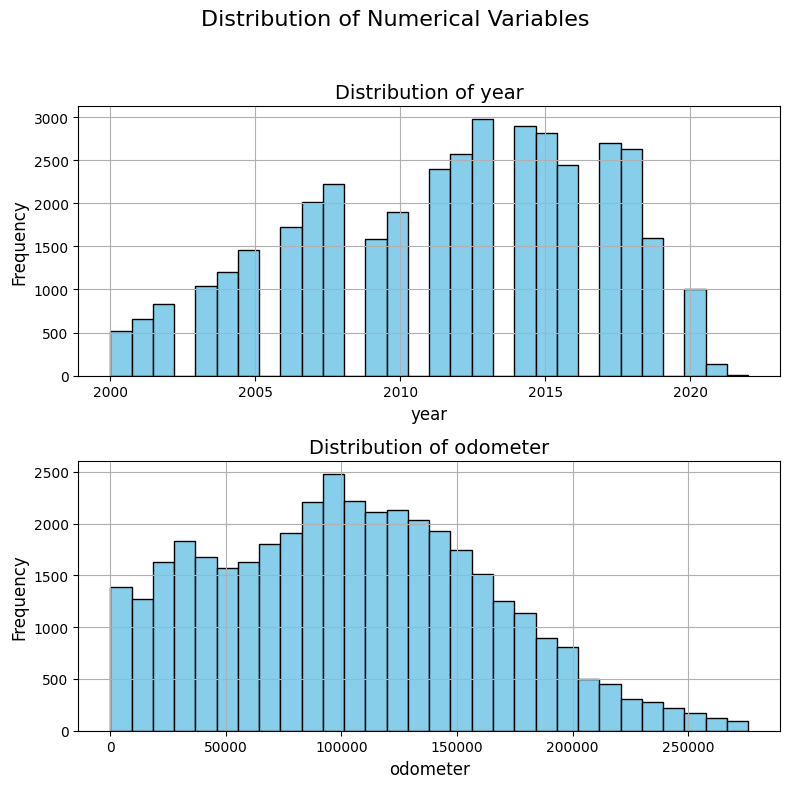

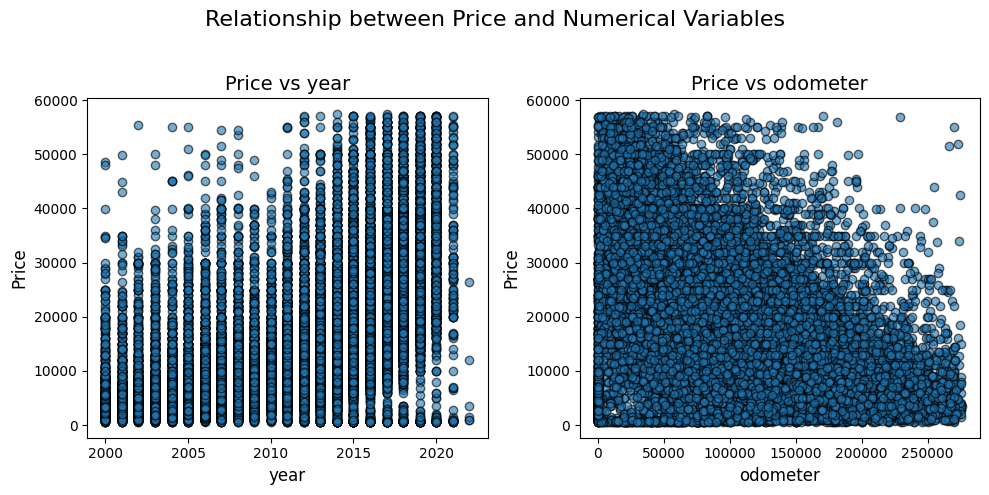

In [16]:
import matplotlib.pyplot as plt

file_path = 'sample_data/vehicles_cleaned_outliers_removed.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
data_cleaned = data.dropna().drop_duplicates()

# Sample the data for visualization purposes
data_sampled = data_cleaned.sample(frac=0.2, random_state=42)

# Split categorical and numerical columns for plotting
categorical_columns = categorical_features
numerical_columns = numerical_features

# Plot for categorical variables
fig, axes = plt.subplots(nrows=len(categorical_columns), figsize=(8, len(categorical_columns) * 4))
fig.suptitle("Distribution of Categorical Variables", fontsize=16)

for ax, column in zip(axes, categorical_columns):
    data_sampled[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribution of {column}", fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for title
plt.show()

# Plot for numerical variables
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, len(numerical_columns) * 4))
fig.suptitle("Distribution of Numerical Variables", fontsize=16)

for ax, column in zip(axes, numerical_columns):
    data_sampled[column].hist(bins=30, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f"Distribution of {column}", fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Scatter plot for price vs numerical variables
fig, axes = plt.subplots(ncols=len(numerical_columns), figsize=(len(numerical_columns) * 5, 5))
fig.suptitle("Relationship between Price and Numerical Variables", fontsize=16)

for ax, column in zip(axes, numerical_columns):
    ax.scatter(data_sampled[column], data_sampled['price'], alpha=0.6, edgecolor='black')
    ax.set_title(f"Price vs {column}", fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel("Price", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()






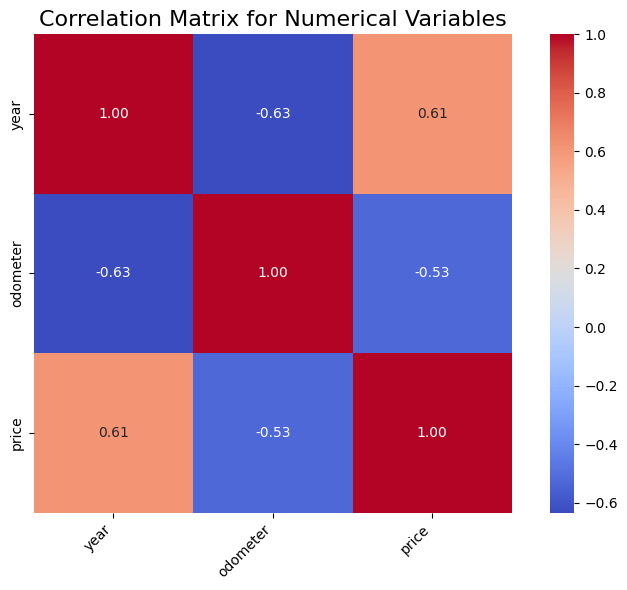

In [18]:
import seaborn as sns

# Drop rows with missing values
data_cleaned = data.dropna().drop_duplicates()

# Sample the data for visualization purposes

# Compute the correlation matrix for numerical features
correlation_matrix = data_cleaned[numerical_columns + ['price']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title("Correlation Matrix for Numerical Variables", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'sample_data/vehicles_cleaned_outliers_removed.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values
data_cleaned = data.dropna().drop_duplicates()

# Define features (X) and target variable (y)
X = data_cleaned.drop(columns=['price', 'model', 'manufacturer'])
y = data_cleaned['price']

# Select categorical and numerical features
categorical_features = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'paint_color']
numerical_features = ['year', 'odometer']

# Grouping Less Frequent Categories
def group_rare_categories(df, column, threshold=0.05):
    """
    Groups less frequent categories in a categorical column into 'Other'.
    """
    freq = df[column].value_counts(normalize=True)
    rare_categories = freq[freq < threshold].index
    df[column] = df[column].apply(lambda x: 'Other' if x in rare_categories else x)
    return df

# Apply grouping to categorical columns
for col in categorical_features:
    data_cleaned = group_rare_categories(data_cleaned, col)

# Define RMSE as a scoring metric
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

# Preprocess categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Transform the features using the preprocessor
X_transformed = preprocessor.fit_transform(X)

# Train a Random Forest Regressor to get feature importance
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Combine transformed feature names
feature_names_transformed = numerical_columns + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names_transformed,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Remove Features with Low Importance
importance_threshold = 0.01
selected_features = importance_df[importance_df['Importance'] > importance_threshold]['Feature']
X_transformed_reduced = X_train[:, importance_df['Importance'] > importance_threshold]

# Compute Correlation Matrix for Numerical Variables
correlation_matrix = data_cleaned[numerical_features].corr()

# Identify Highly Correlated Features (correlation > 0.9)
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            correlated_features.add(correlation_matrix.columns[i])

# Drop Correlated Features from Original Data
X_reduced = data_cleaned.drop(columns=correlated_features)

# Visualize Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance for Price Prediction", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

# Display the Top Features
print("Top Features by Importance:")
print(importance_df.head(10))


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.